In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

**Вариант 9.**

**№1(4.1.9)**

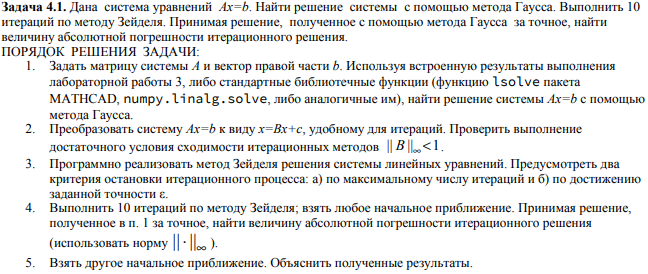

In [2]:
Image('4.1.9.png')

In [207]:
A = [[118.8, -14, -5, -89.1], [-14.85, -20, -5, 0], [297, 16, 320, 0], [0, 6, -30, -36.3]]
b = [444.5, -41.05, -635, 209.3]
A = np.array(A)
b = np.array(b)
A

array([[118.8 , -14.  ,  -5.  , -89.1 ],
       [-14.85, -20.  ,  -5.  ,   0.  ],
       [297.  ,  16.  , 320.  ,   0.  ],
       [  0.  ,   6.  , -30.  , -36.3 ]])

In [208]:
x_r = np.linalg.solve(A,b)
print(x_r)
np.allclose(np.dot(A,x_r), b)

[ 2.09090909  1.5        -4.         -2.21212121]


True

**Решение, которое мы принимаем за точное**

In [209]:
m = A.shape[0]

In [215]:
def decomp(A):
    D,U,L,D_obr = np.zeros([m,m]),np.zeros([m,m]),np.zeros([m,m]), np.zeros([m,m])

    for i in range(0, m):
        D[i,i] = A[i,i]
        D_obr[i,i] = 1/A[i,i]

    for i in range(0,m):
        for j in range(0,m):
            if(i < j):
                U[i,j] = A[i,j]

    for i in range(0,m):
        for j in range(0,m):
            if(i > j):
                L[i,j] = A[i,j] 
    return(D,U,L,D_obr)

In [216]:
B = np.dot(D_obr,L+U)
n_B = np.linalg.norm(B, np.inf)
print(n_B)

0.9925


**Норма < 1, значит достаточное условие выполнено**

In [217]:
def seidel(A, b, n, eps, x_0):
    D,U,L,D_obr = decomp(A)
    k = 0 
    x_0 = np.array(x_0)
    x = x_0
    x = np.array(x)
    C = np.dot(D_obr, b)
    for i in range(0,n):
        for j in range(0,m):
            x[j] = -np.dot(D_obr,np.dot(L,x))[j] - np.dot(D_obr,np.dot(U,x_0))[j] + C[j]
        if np.linalg.norm(x - x_0, np.inf) < (1 - n_B)/np.linalg.norm(U, np.inf) * eps :
            break
        x_0 = np.copy(x)
        k += 1
    return(x,k)
    

In [218]:
x_0 = [0.1,0.1,0.1,0.1]
seidel(A, b, 10, 1e-6, x_0)

(array([ 2.09184798,  1.49976233, -4.00085953, -2.21145014]), 10)

In [219]:
np.linalg.norm(seidel(A, b, 10, 1e-6,x_0)[0] - x_r, np.inf)

0.000938892040630801

**Величина абсолютной погрешности для начального приближения [0.1,0.1,0.1,0.1]**

In [220]:
x_0 = [1,1,1,1]
np.linalg.norm(seidel(A, b, 10, 1e-6,x_0)[0] - x_r, np.inf)

0.9999999999999982

**Величина абсолютной погрешности для начального приближения [1,1,1,1].
Поскольку норма матрицы B близка единице, то сходимость метода в данном случае медленная, а значит результат будет сильно зависеть от начального приближения.** 

**№2(4.2)**

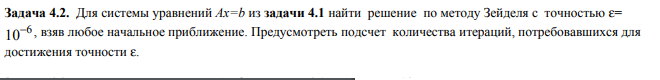

In [3]:
Image('4.2.png')

In [221]:
x_0 = [0.1,0.1,0.1,0.1]
x, n = seidel(A, b, 10000, 1e-6, x_0)
print('Приближенное решение:', x)
print('Количество итераций:', n)

Приближенное решение: [ 2.09090909  1.5        -4.         -2.21212121]
Количество итераций: 31


**№3(4.4.3)**

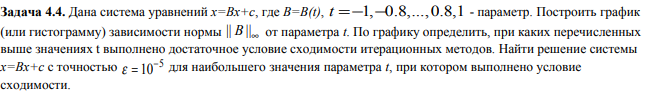

In [4]:
Image('4.4.3.png')

In [222]:
def B(t):
    B = [[0.2, 0.3, np.sin(3*t)], [0.1, -0.25, 0.3], [0.2, 0.1, 0.3]]
    return(B)

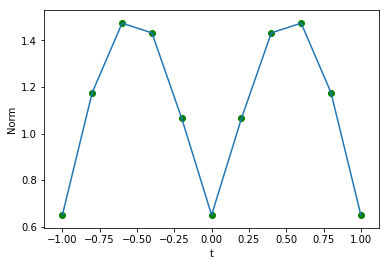

In [223]:
t = np.arange(-1,1.2,0.2)
y = []
for x in t:
    y.append(np.linalg.norm(B(x), np.inf))
plt.plot(t,y)
plt.xlabel('t')
plt.ylabel('Norm')
plt.scatter(t, y, c = 'g')

**Норма минимальна при t =-1, 0, 1, поэтому примем t = 1 для дальнейших вычислений**

In [224]:
c = [1,2,1]
x = [1,1,1]
x_0 = [1,1,1]
x = np.array(x)
b = np.linalg.norm(B(1), np.inf)
k = 0 

for i in range(0,1000):
    x = -np.dot(B(1), x) + c 
    k += 1
    if np.linalg.norm(x - x_0, np.inf) <= (1 - b)/b * 1e-5 :
            break
    x_0 = np.copy(x)

print('Приближенное решение:', x)
print('Количество итераций:', k)

Приближенное решение: [0.16225364 2.42184288 0.55797148]
Количество итераций: 19


**№4(4.9.3)**